# 1. Uvod


## Opis problema

Finansijske institucije trpe značajne gubitke zbog neplaćanja auto kredita. Ovo je dovelo do pooštravanja kriterijuma za odobravanje auto kredita i povećanja stope odbijanja zahteva za kredit. Potreba za boljim modelom za ocenjivanje kreditnog rizika je takođe postala očigledna. Ovo zahteva istraživanje kako bi se procenile determinante neplaćanja auto kredita. Finansijska institucija vas je angažovala da tačno predvidite verovatnoću da korisnik kredita neće platiti prvu ratu auto kredita na vreme. Sledeće informacije o kreditu i korisniku kredita su dostupne u datasetovima:
- 	Informacije o korisniku kredita (demografski podaci kao što su starost, dokaz o identitetu itd.)
-	Informacije o kreditu (detalji o isplati kredita, odnos vrednosti kredita prema vrednosti vozila itd.)
-	Podaci iz kreditnog biroa i istorija (kreditni skor, broj aktivnih računa, status drugih kredita, kreditna istorija itd.)

Na ovaj način će se osigurati da klijenti koji su sposobni za otplatu kredita ne budu odbijeni, a važni faktori se mogu identifikovati i dalje koristiti za minimiziranje stope neplaćanja.


## Koji su izazovi u resavanju problema (kasnije bolje)

1.	Nedostatak podataka: Mnogi podaci mogu biti nepotpuni ili netačni, što otežava precizno modeliranje.
2.	Balansiranje podataka: Distribucija ciljne promenljive (neplaćanje kredita) je neizbalansirana, sa mnogo više negativnih (plaćenih) nego pozitivnih (neplaćenih) primera.
3.	Identifikacija ključnih faktora: Identifikacija i selekcija relevantnih karakteristika koje utiču na neplaćanje kredita.
4.	Vremenska komponenta: Promene u ekonomskim uslovima tokom vremena mogu značajno uticati na ponašanje korisnika kredita.


## Zašto je bitan

Precizno predviđanje neplaćanja auto kredita je važno iz više razloga:

1.	Finansijska stabilnost: Smanjuje finansijske gubitke za banke i druge finansijske institucije.
2.	Poboljšanje procesa odobravanja kredita: Omogućava pravedniji i efikasniji proces odobravanja kredita, smanjujući broj neopravdano odbijenih kredita.
3.	Povećanje poverenja klijenata: Poboljšava odnos sa klijentima pružajući im bolje usluge i proizvode.

## Kome je bitan

1.	Finansijskim institucijama: Pomaže bankama i kreditnim institucijama da smanje gubitke i optimizuju svoje kreditne procese.
2.	Auto salonima: Omogućava im da ponude kvalitetnija vozila svojim kupcima i smanje rizik loših kupovina.
3.	Kupcima: Povećava poverenje kupaca u kvalitet vozila koja kupuju i u fer kreditne uslove.
4.	Regulatornim telima: Pomaže u stvaranju politika i regulativa koje poboljšavaju stabilnost finansijskog sistema.

U zaključku, razvoj tačnog modela za predviđanje neplaćanja auto kredita može doneti brojne benefite različitim zainteresovanim stranama, poboljšavajući ukupnu efikasnost i stabilnost finansijskog tržišta.


# 2. Analiza podataka

## Importovanje podataka i biblioteka

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
dictionary = pd.read_csv('data_dictionary.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Podatke ćemo držati razdvojene i za vreme analize i pripreme kako bismo izbegli curenje informacija

In [78]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [79]:
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


Posto test data set ne sadrzi targetnu varijablu, ovaj data set ne mozemo da koristimo u daljoj analizi. Stoga, pravimo sopstveni test set

Ovaj korak obavljamo na pocetku kako bismo izbegli moguce curenje informacija

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
train, test = train_test_split(train, test_size=0.2, random_state=42)

## Opis atributa

 **Informacije o korisniku**

1.	UniqueID: Identifikator za korisnike.
2.	Current_pincode: Poštanski broj trenutne adrese korisnika.
3.	Date.of.Birth: Datum rođenja korisnika.
4.	Employment.Type: Tip zaposlenja korisnika (Salaried/Self Employed).
5.	MobileNo_Avl_Flag: Indikator da li je korisnik podelio broj mobilnog telefona (1 - da, 0 - ne).
6.	Aadhar_flag: Indikator da li je korisnik podelio Aadhar broj (1 - da, 0 - ne).
7.	PAN_flag: Indikator da li je korisnik podelio PAN broj (1 - da, 0 - ne).
8.	VoterID_flag: Indikator da li je korisnik podelio broj biračke kartice (1 - da, 0 - ne).
9.	Driving_flag: Indikator da li je korisnik podelio broj vozačke dozvole (1 - da, 0 - ne).
10.	Passport_flag: Indikator da li je korisnik podelio broj pasoša (1 - da, 0 - ne).

**Informacije o kreditu**

11.	loan_default: Indikator neplaćanja prve rate kredita na datum dospeća. (Zavisna varijbla - Output)
12.	disbursed_amount: Iznos kredita koji je odobren i isplaćen korisniku.
13.	asset_cost: Cena imovine za koju je kredit uzet.
14.	ltv (Loan to Value): Odnos vrednosti kredita prema vrednosti imovine.
15.	branch_id: Identifikator filijale gde je kredit odobren.
16.	supplier_id: Identifikator prodavca vozila gde je kredit odobren.
17.	manufacturer_id: Identifikator proizvođača vozila (Hero, Honda, TVS itd.).
18.	DisbursalDate: Datum kada je kredit odobren.
19.	State_ID: Identifikator države gde je kredit odobren.
20.	Employee_code_ID: Identifikator zaposlenog koji je registrovao odobravanje kredita.
21.	PRIMARY.INSTAL.AMT: Iznos mesečne rate za primarni kredit.
22.	SEC.INSTAL.AMT: Iznos mesečne rate za sekundarni kredit.

**Podaci iz kreditnog biroa i istorija**

23.	PERFORM_CNS.SCORE: Kreditni skor korisnika iz kreditnog biroa.
24.	PERFORM_CNS.SCORE.DESCRIPTION: Opis kreditnog skora iz kreditnog biroa.
25.	PRI.NO.OF.ACCTS: Broj primarnih kredita koje je korisnik uzeo do trenutka odobrenja.
26.	PRI.ACTIVE.ACCTS: Broj aktivnih primarnih kredita koje korisnik ima.
27.	PRI.OVERDUE.ACCTS: Broj primarnih kredita sa kašnjenjem u otplati.
28.	PRI.CURRENT.BALANCE: Ukupan iznos glavnice koji je ostao za otplatu na aktivnim primarnim kreditima.
29.	PRI.SANCTIONED.AMOUNT: Ukupan iznos koji je odobren za sve primarne kredite.
30.	PRI.DISBURSED.AMOUNT: Ukupan iznos koji je isplaćen za sve primarne kredite.
31.	SEC.NO.OF.ACCTS: Broj sekundarnih kredita koje je korisnik uzeo.
32.	SEC.ACTIVE.ACCTS: Broj aktivnih sekundarnih kredita koje korisnik ima.
33.	SEC.OVERDUE.ACCTS: Broj sekundarnih kredita sa kašnjenjem u otplati.
34.	SEC.CURRENT.BALANCE: Ukupan iznos glavnice koji je ostao za otplatu na aktivnim sekundarnim kreditima.
35.	SEC.SANCTIONED.AMOUNT: Ukupan iznos koji je odobren za sve sekundarne kredite.
36.	SEC.DISBURSED.AMOUNT: Ukupan iznos koji je isplaćen za sve sekundarne kredite.
37.	NEW.ACCTS.IN.LAST.SIX.MONTHS: Broj novih kredita koje je korisnik uzeo u poslednjih šest meseci.
38.	DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: Broj kredita sa kašnjenjem u otplati u poslednjih šest meseci.
39.	AVERAGE.ACCT.AGE: Prosečno trajanje kredita korisnika.
40.	CREDIT.HISTORY.LENGTH: Dužina kreditne istorije korisnika.
41.	NO.OF_INQUIRIES: Broj upita koje je korisnik imao za kredite.


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186523 entries, 95952 to 121958
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             186523 non-null  int64  
 1   disbursed_amount                     186523 non-null  int64  
 2   asset_cost                           186523 non-null  int64  
 3   ltv                                  186523 non-null  float64
 4   branch_id                            186523 non-null  int64  
 5   supplier_id                          186523 non-null  int64  
 6   manufacturer_id                      186523 non-null  int64  
 7   Current_pincode_ID                   186523 non-null  int64  
 8   Date.of.Birth                        186523 non-null  object 
 9   Employment.Type                      180454 non-null  object 
 10  DisbursalDate                        186523 non-null  object 
 11  State_ID      

## Istrazivanje podataka

### Deskriptivna statistika

In [83]:
num_col = train.select_dtypes(include=['number']).columns
cat_col = train.select_dtypes(include=['object']).columns

In [84]:
train[num_col].describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,186523.000000,186523.000000,1.865230e+05,186523.000000,186523.00000,186523.000000,186523.000000,186523.000000,186523.000000,186523.000000,...,186523.000000,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,186523.000000,186523.000000,186523.000000,186523.000000
mean,535971.642666,54367.638238,7.585329e+04,74.761775,72.84455,19638.618417,69.055661,3398.107520,7.258402,1547.197595,...,0.007259,5.017266e+03,6.887414e+03,6.772342e+03,1.312932e+04,3.268232e+02,0.382779,0.097677,0.207213,0.216901
std,68280.956957,13048.436679,1.903002e+04,11.439661,69.78484,3491.429196,22.132682,2237.076509,4.479580,974.986927,...,0.112202,1.451269e+05,1.544385e+05,1.538029e+05,1.490820e+05,1.667720e+04,0.956198,0.387057,0.708486,0.412136
min,417428.000000,13320.000000,3.700000e+04,13.500000,1.00000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-1.555270e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476981.000000,47145.000000,6.573100e+04,68.910000,14.00000,16535.000000,48.000000,1512.000000,4.000000,708.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535957.000000,53803.000000,7.095900e+04,76.820000,61.00000,20333.000000,86.000000,2970.000000,6.000000,1448.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595109.000000,60447.000000,7.915000e+04,83.680000,130.00000,23000.000000,86.000000,5676.000000,10.000000,2358.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.988500e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.00000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,1.980000e+07,1.980000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


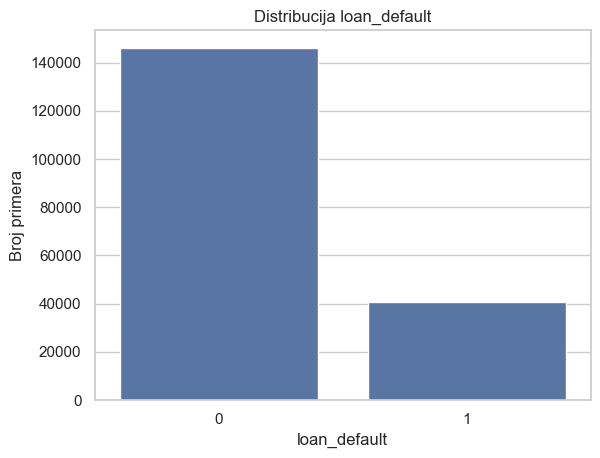

In [85]:
# Vizuelizacija distribucije loan_default
sns.countplot(x='loan_default', data=train)
plt.title('Distribucija loan_default')
plt.xlabel('loan_default')
plt.ylabel('Broj primera')
plt.show()

In [86]:
# Dobijanje tačnog broja instanci za svaku klasu
counts = train['loan_default'].value_counts()
percentages = train['loan_default'].value_counts(normalize=True) * 100

print("Broj instanci za svaku klasu:\n")
print(counts)

print("\n\nProcenat svake od klasa:\n")
print(percentages)

Broj instanci za svaku klasu:

loan_default
0    146066
1     40457
Name: count, dtype: int64


Procenat svake od klasa:

loan_default
0    78.309914
1    21.690086
Name: proportion, dtype: float64



**Disbalans atributa loan_default**

U našem datasetu, izlazni atribut loan_default nije ravnomerno raspoređen; imamo 182543 instanci za vrednost 0 (nezadato) i 50611 instanci za vrednost 1 (zadato). To znači da je naš dataset disbalansiran.

Ovakav disbalans može dovesti do nekoliko problema:

- Model može postati pristrasan ka većinskoj klasi (klasa 0), što može rezultirati visokim procentom tačnih predikcija za većinsku klasu, ali lošom performansom za manjinsku klasu (klasa 1).
- Model može imati lošiju sposobnost generalizacije za primere iz manjinske klase, što može biti kritično u realnim scenarijima gde je predviđanje manjinske klase (npr. detekcija neplaćenih kredita) važnije.

**Opis cene različitih grešaka**

Postoje dve glavne vrste grešaka u klasifikacionim modelima: lažno pozitivne (False Positives) i lažno negativne (False Negatives). U kontekstu loan_default, ove greške imaju različite posledice:

Lažno pozitivne greške (False Positives, FP):

- Šta znači: Model predviđa da će korisnik vratiti kredit (klasa 1), ali korisnik zapravo neće vratiti kredit (klasa 0).
- Posledice: Banka može odobriti kredit korisnicima koji neće vratiti kredit, što može dovesti do finansijskih gubitaka i povećanja rizika.

Lažno negativne greške (False Negatives, FN):

- Šta znači: Model predviđa da korisnik neće vratiti kredit (klasa 0), ali korisnik zapravo hoće vratiti kredit (klasa 1).
- Posledice: Banka može pogrešno odbiti kredit korisnicima koji bi redovno otplaćivali svoje obaveze, što može dovesti do gubitka potencijalnih prihoda i nezadovoljstva klijenata.

**Upravljanje disbalansom klasa**

Da bi se adresirao problem disbalansa klasa, mogu se primeniti sledeći pristupi:

- Reuzorkovanje podataka:
Oversampling manjinske klase: Povećavanje broja instanci klase 1 pomoću tehnika kao što su SMOTE (Synthetic Minority Over-sampling Technique).
Undersampling većinske klase: Smanjenje broja instanci klase 0 kako bi se postigla ravnoteža sa klasom 1.

- Korišćenje ponderisanih metrika:Upotreba metrika kao što su ponderisani F1 skor, ponderisana preciznost i osetljivost koje uzimaju u obzir disbalans klasa.

- Ponderisanje gubitka (Loss weighting): U modelu se mogu primeniti različite težine za greške klase 0 i klase 1 tokom treniranja, kako bi se penalizovale greške za manjinsku klasu.

### Priprema podataka za vizuelizaciju

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

#### Zameniti "." sa "_" u imenima kolona

In [88]:
class ColumnRename (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X.columns = X.columns.str.replace('.', '_', regex=False)
        return X

#### Kastovanje numerickih atributa u pravilni kategoricki tip

In [89]:
class CastToCategory (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X['branch_id'] = X['branch_id'].astype('category')
        X['supplier_id'] = X['supplier_id'].astype('category')
        X['manufacturer_id'] = X['manufacturer_id'].astype('category')
        X['Current_pincode_ID'] = X['Current_pincode_ID'].astype('category')
        X['Employment_Type'] = X['Employment_Type'].astype('category')
        X['State_ID'] = X['State_ID'].astype('category')
        X['Employee_code_ID'] = X['Employee_code_ID'].astype('category')
        X['PERFORM_CNS_SCORE_DESCRIPTION'] = X['PERFORM_CNS_SCORE_DESCRIPTION'].astype('category')
        X['MobileNo_Avl_Flag'] = X['MobileNo_Avl_Flag'].astype('category')
        X['Aadhar_flag'] = X['Aadhar_flag'].astype('category')
        X['PAN_flag'] = X['PAN_flag'].astype('category')
        X['VoterID_flag'] = X['VoterID_flag'].astype('category')
        X['Driving_flag'] = X['Driving_flag'].astype('category')
        X['Passport_flag'] = X['Passport_flag'].astype('category')
        X['loan_default'] = X['loan_default'].astype('category')

        
        return X

#### Kastovanje iz DateTime formata u numericki

In [90]:
# function to change age string to number of months
def time_to_months(age):
    age_year, age_month  = age.split(' ')
    age_year = int(age_year.replace('yrs', ''))
    age_month = int(age_month.replace('mon', ''))
    return age_year * 12 + age_month

In [91]:
class CastDateToNum (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        # change dtype
        date_format = '%d-%m-%y'  
        X['Date_of_Birth'] = pd.to_datetime(X['Date_of_Birth'], format=date_format)
        X['DisbursalDate'] = pd.to_datetime(X['DisbursalDate'], format=date_format)

        # Konvertovanje Date_of_Birth u starost
        X['Age'] = pd.Timestamp.now().year - X['Date_of_Birth'].dt.year

        # Pronalaženje najstarijeg datuma u 'DisbursalDate' i korišćenje kao referentni datum
        reference_date = X['DisbursalDate'].min()
        X['Days_from_Ref'] = (X['DisbursalDate'] - reference_date).dt.days


        # convert AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH to numeric
        X['AVERAGE_ACCT_AGE_MONTHS'] = X['AVERAGE_ACCT_AGE'].apply(time_to_months)
        X['CREDIT_HISTORY_LENGTH_MONTHS'] = X['CREDIT_HISTORY_LENGTH'].apply(time_to_months)

        # Izbaciti izmenjene kolone
        X = X.drop(['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH', 'Date_of_Birth', 'DisbursalDate'], axis=1)

        # Pomeranje 'loan_default' na kraj
        X = X[[c for c in X if c not in ['loan_default']] + ['loan_default']]


        return X

#### Izbaciti nepotrebne kolone

In [92]:
train[cat_col].nunique()

Date.of.Birth                    15107
Employment.Type                      2
DisbursalDate                       84
PERFORM_CNS.SCORE.DESCRIPTION       20
AVERAGE.ACCT.AGE                   192
CREDIT.HISTORY.LENGTH              289
dtype: int64

Izbacujemo:
- **UniqueID** zato sto ima razlicitih klasa koliko i instanci, pa nam stoga nicemu ne sluzi
- **MobileNo_Avl_Flag** zato sto ima samo jednu vrednost za sve instance
- **supplier_id, Current_pincode_ID, branch_id i Employee_code_ID** izbacujemo zato sto imaju previse razlicitih klasa i sluze kao identifikatori

Komentar: Iako su **manufacturer_id i State_ID** identifikatori, i kao takvi verovatno nemaju veliku korist u analizi, ostavljamo ih zato sto je broj razlicith klasa relativno mali i mozda mogu da se ispostave kao korisni

In [93]:
class ColumnDropper (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X = X.drop(['UniqueID', 'MobileNo_Avl_Flag', 'supplier_id', 'Current_pincode_ID', 
                       'branch_id', 'Employee_code_ID'], axis = 1)
        return X

#### Nedostajuce vrednosti

In [94]:
train.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        6069
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

Odlucili smo se na dodavanje vrednosti "Unknown" umesto brisanja redova sa nedostajućim vrednostima (NaN) iz nekoliko razloga:

- Očuvanje podataka: Brisanje redova može dovesti do gubitka korisnih informacija koje mogu biti važne za analizu ili modeliranje podataka.
- Održavanje konzistentnosti: Dodavanjem "Unknown" kao nove kategorije, održavamo konzistentan format podataka u koloni Employment_Type. 
- Smanjenje uticaja na analizu: Ako je broj redova sa nedostajućim vrednostima relativno mali u poređenju sa ukupnim skupom podataka, dodavanje "Unknown" može biti prihvatljivo kako bi se smanjio uticaj nedostajućih podataka na rezultate analize.

In [95]:
class NAFiller (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X['Employment_Type'] = X['Employment_Type'].fillna('Unknown')
        return X


#### Pokretanje preprocesora za vizualizaciju

In [96]:
visual_preprocess =  Pipeline(
    [ 
    ('renamer', ColumnRename()),
    ('nafiller', NAFiller()),
    ('caster', CastToCategory()),
    ('date_caster', CastDateToNum()),
    ('dropper', ColumnDropper())

    ]
)

In [97]:
train  = visual_preprocess.fit_transform(train)

In [98]:
test  = visual_preprocess.fit_transform(test)

In [99]:
num_col = train.select_dtypes(include=['number']).columns
cat_col = train.select_dtypes(exclude=['number']).columns

### Vizualizacija podataka

#### Korelacije

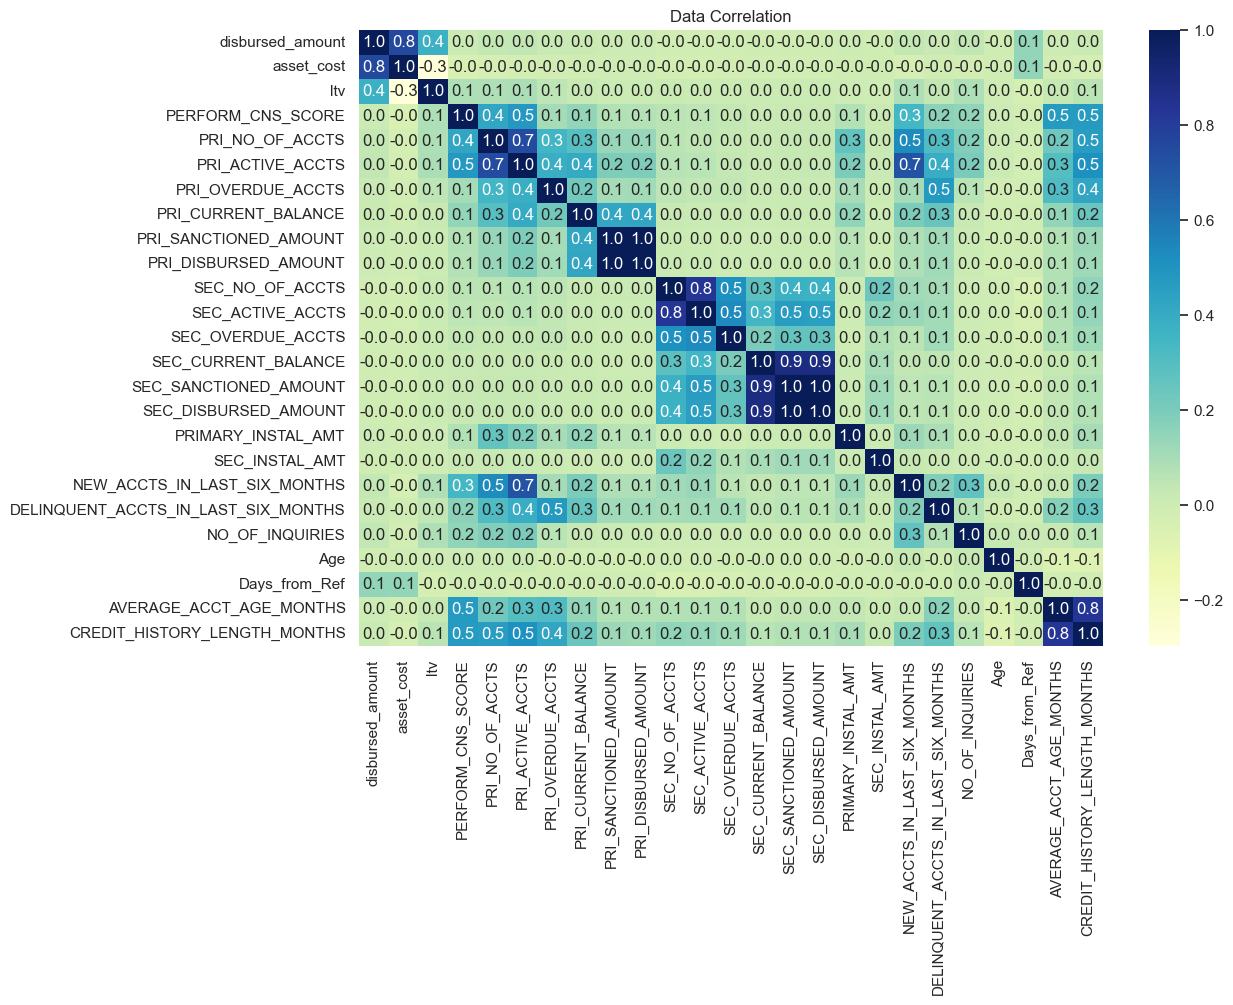

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(train[num_col].corr(), cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Data Correlation')
plt.show()

In [101]:
correlation_matrix = train[num_col].corr()
correlation_series = correlation_matrix.unstack()

# Izbaci duplikate
correlation_series = correlation_series[correlation_series.index.map(frozenset).duplicated(keep='first') == False]
filtered_correlation_series = correlation_series[(correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1))]

sorted_filtered_correlation_series = filtered_correlation_series.reindex(filtered_correlation_series.abs().sort_values(ascending=False).index)

print("10 najjacih korelacija")
print(sorted_filtered_correlation_series.head(10))


10 najjacih korelacija
SEC_SANCTIONED_AMOUNT    SEC_DISBURSED_AMOUNT            0.999491
PRI_SANCTIONED_AMOUNT    PRI_DISBURSED_AMOUNT            0.998727
SEC_CURRENT_BALANCE      SEC_DISBURSED_AMOUNT            0.886406
                         SEC_SANCTIONED_AMOUNT           0.885313
AVERAGE_ACCT_AGE_MONTHS  CREDIT_HISTORY_LENGTH_MONTHS    0.831077
SEC_NO_OF_ACCTS          SEC_ACTIVE_ACCTS                0.829951
disbursed_amount         asset_cost                      0.757174
PRI_NO_OF_ACCTS          PRI_ACTIVE_ACCTS                0.747286
PRI_ACTIVE_ACCTS         NEW_ACCTS_IN_LAST_SIX_MONTHS    0.711726
SEC_ACTIVE_ACCTS         SEC_OVERDUE_ACCTS               0.536112
dtype: float64


Mozemo da primetimo veoma snaznu korelaciju izmedju:
- *SEC.SANCTIONED.AMOUNT*, tj. ukupnog iznosa koji je odobren za sve sekundarne kredite i *SEC.DISBURSED.AMOUNT*, tj. ukupnog iznosa koji je isplaćen za sve sekundarne kredite. Posto su ova dva atributa fakticki ista, **jednog od njih cemo izbaciti**
- Isto vazi i za
    - *PRI.SANCTIONED.AMOUNT* i *PRI.DISBURSED.AMOUNT*
    - *SEC.CURRENT.BALANCE* i *SEC.DISBURSED.AMOUNT*
    - *SEC.CURRENT.BALANCE* i *SEC.SANCTIONED.AMOUNT*

Mozemo da primetimo umerenu snaznu korelaciju izmedju:
- *SEC.NO.OF.ACCTS*, tj. broja sekundarnih kredita koje je korisnik uzeo i *SEC.ACTIVE.ACCTS*, broja aktivnih sekundarnih kredita koje korisnik ima         
- *PRI.NO.OF.ACCTS*, tj. broja primarnih kredita koje je korisnik uzeo i         *PRI.ACTIVE.ACCTS*, broja aktivnih primarnih kredita koje korisnik ima             
- *disbursed_amount*, tj. iznosa kredita koji je odobren i isplaćen korisniku, i      *asset_cost*, cene imovine za koju je kredit uzet
- *PRI.ACTIVE.ACCTS*, broja aktivnih primarnih kredita koje korisnik ima i *NEW.ACCTS.IN.LAST.SIX.MONTHS*, broja novih kredita koje je korisnik uzeo u poslednjih šest meseci


#### Odnosi ostalih atributa sa ciljnim atributom

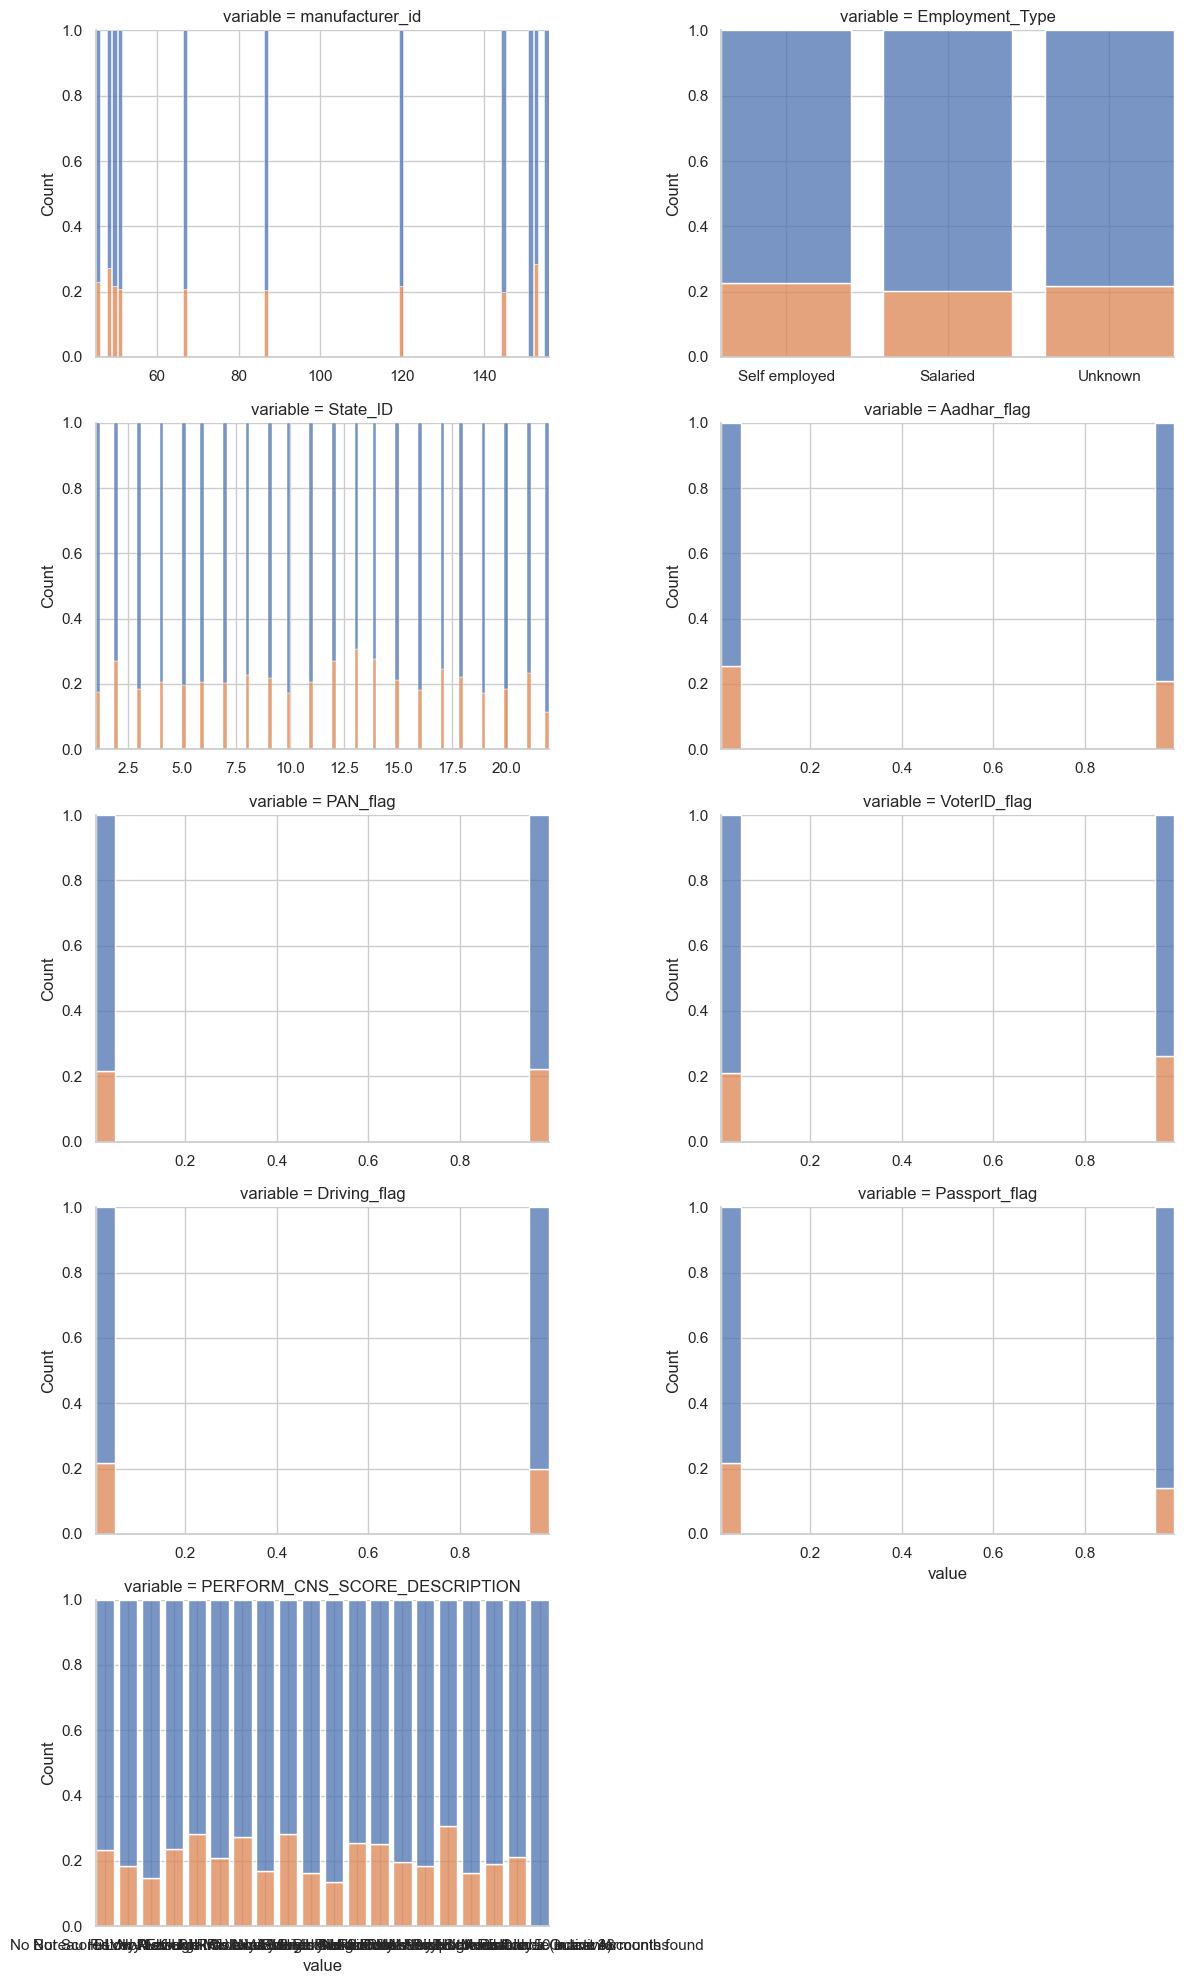

In [102]:

sns.set_theme(style="whitegrid")

# Try with a subset of categorical columns to debug
subset_cat_col = cat_col  # Adjust based on the number of categories

# Melt the dataframe
melted_df = pd.melt(train, id_vars='loan_default', value_vars=subset_cat_col)

# Create a FacetGrid with 3 columns and adjusted size
g = sns.FacetGrid(melted_df, col='variable', col_wrap=2, height=4, aspect=1.5, sharex=False, sharey=False)

# Map the histogram plot to each subplot
g.map_dataframe(sns.histplot, x='value', hue='loan_default', multiple='fill', shrink=0.8)

# Adjust the layout and display the plot
plt.tight_layout()

plt.savefig("facet_grid.png")  # Save the plot to a file
plt.show()


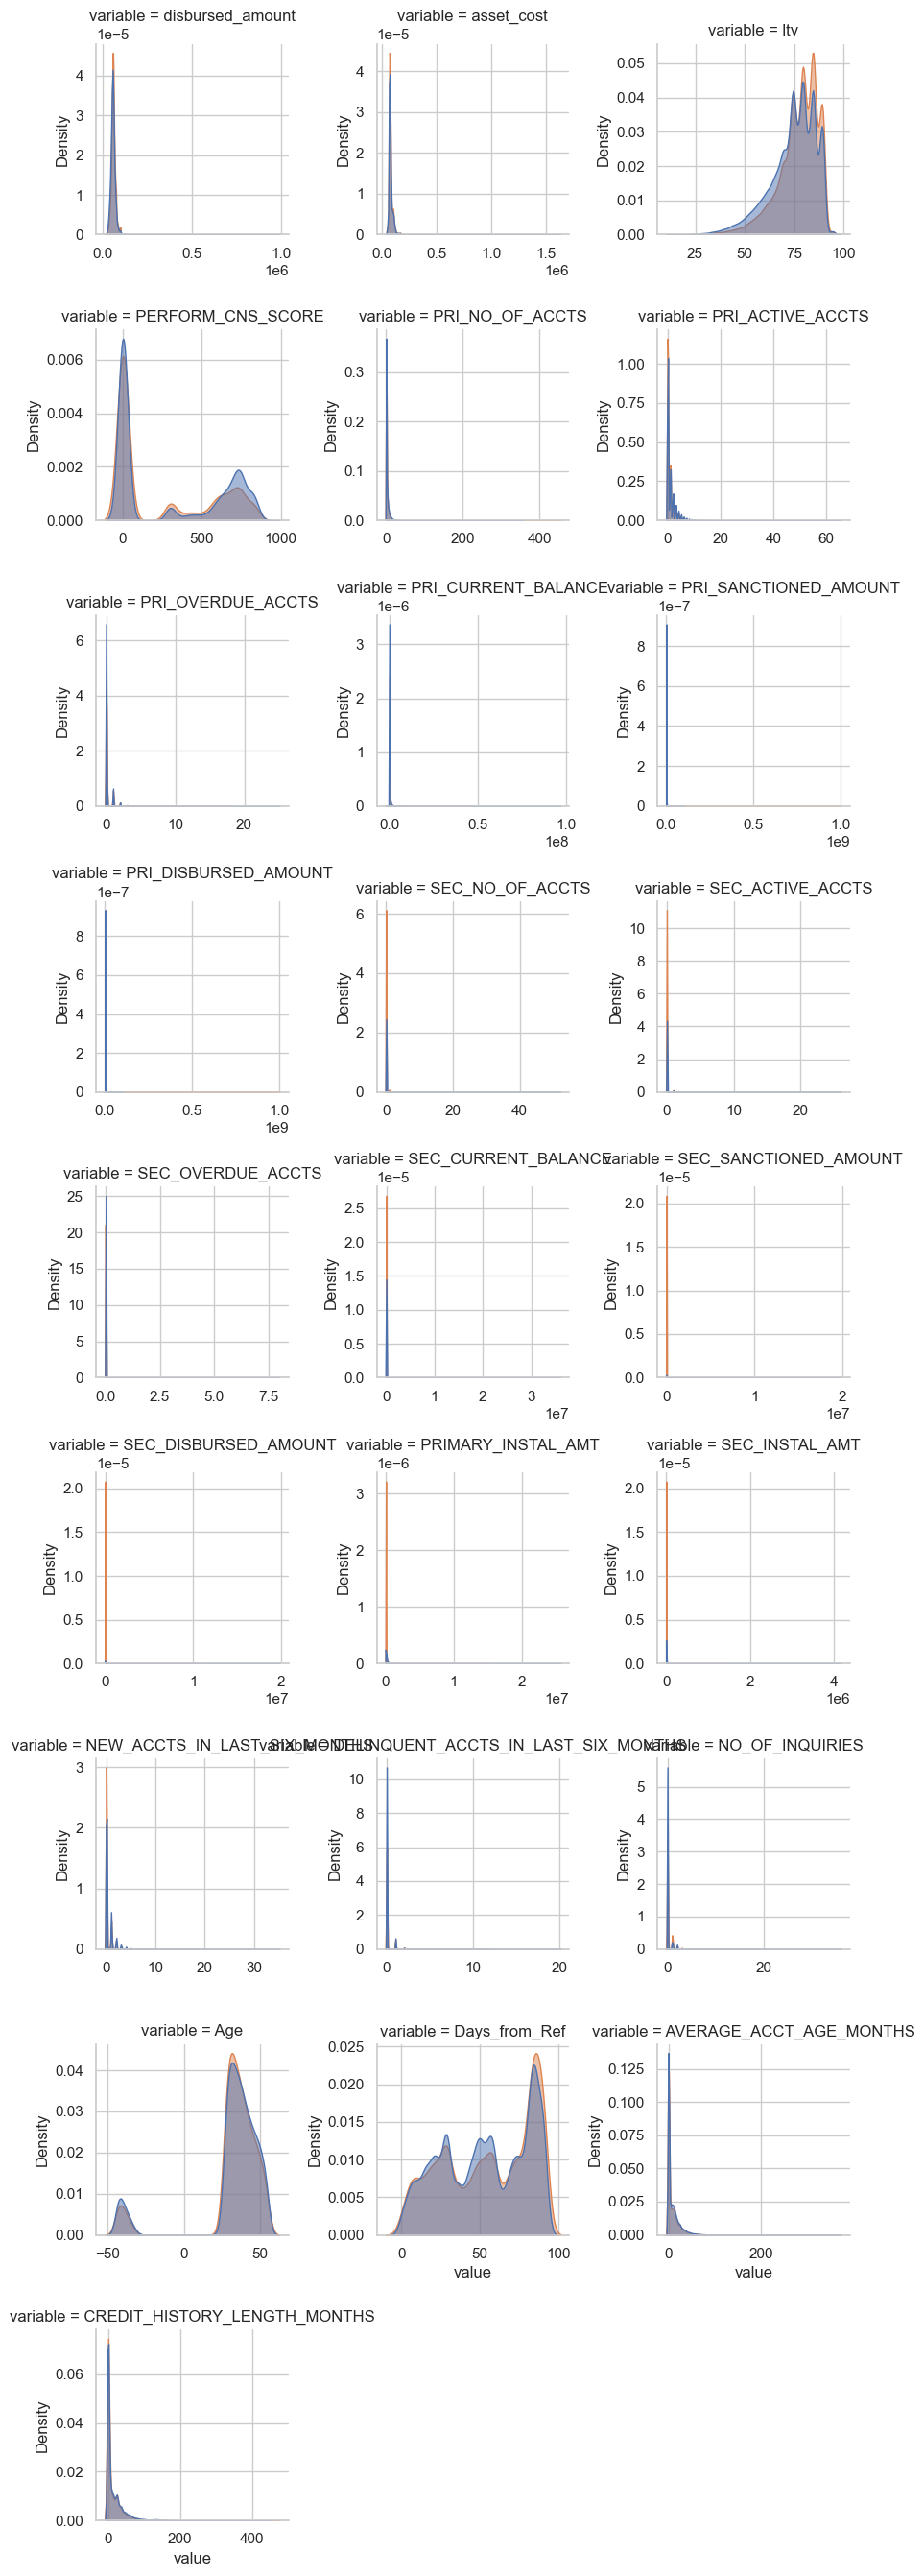

In [103]:
subset_num_col = num_col#[10:15]  # Adjust based on the number of categories

melted_df = train.melt(id_vars=['loan_default'], value_vars=subset_num_col, var_name='variable', value_name='value')

# Set the minimal theme
sns.set_theme(style="whitegrid")

# Create a FacetGrid with 2 rows and 5 columns
g = sns.FacetGrid(melted_df, col='variable', col_wrap=3, sharex=False, sharey=False)

# Map the kdeplot to each subplot
g.map_dataframe(sns.kdeplot, x='value', hue='loan_default', fill=True, common_norm=False, alpha=0.5)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Na osnovu dobijenih grafikona je tesko odrediti koji atributi su nam korisni u predikciji, stoga ćemo selekciju atributa vršiti preko PCA

# 3. Priprema podataka za treniranje

## Dalje izbacivanje nepotrebnih atributa

Izbacujemo sledece kolone jer imaju izuzetno visuku korelaciju sa drugim atributima i to nam stvara redundansu u podacima:
- 'SEC_DISBURSED_AMOUNT'
- 'PRI_DISBURSED_AMOUNT'
- 'SEC_CURRENT_BALANCE' 

In [105]:
class ColumnDropper2 (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X = X.drop(['SEC_DISBURSED_AMOUNT', 'PRI_DISBURSED_AMOUNT','SEC_CURRENT_BALANCE'], axis = 1)
        return X

## Skaliranje podataka

In [106]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [115]:
class CustomScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        
        return self

    def transform(self, X):
        num_col = X.select_dtypes(include=['number']).columns
        scaler = StandardScaler()
        scaler.fit(X[num_col])

        # Ovu kopiju pravimo da bismo izbegli komplikacije u upisivanju novih vrednosti
        X_copy = X.copy()  

        X_norm = scaler.transform(X_copy[num_col])
    
        X_copy[num_col] = X_norm
        
        return X_copy

## One-hot encoding

## Hendlovanje outliera

In [126]:
from sklearn.preprocessing import OneHotEncoder

## Izvodenje novih atributa

## Balansiranje podataka

## Pokretanje training_preprocess

In [108]:
train2 = train

In [109]:
train2.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment_Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,Age,Days_from_Ref,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,loan_default
95952,60947,75649,83.28,45,Self employed,13,0,0,1,0,...,0,0,0,0,0,51,88,0,0,1
129243,59807,73400,83.37,86,Salaried,4,1,0,0,0,...,16247,0,2,1,2,31,91,8,12,0
173833,64329,92356,72.55,48,Self employed,4,1,0,0,0,...,1230,0,1,0,0,38,80,9,18,0
211992,46469,55200,86.27,45,Salaried,11,1,0,0,0,...,0,0,0,0,0,48,29,0,0,0
78414,56259,69824,81.63,86,Salaried,4,1,0,0,0,...,0,0,0,0,0,29,90,0,0,0


In [119]:
training_preprocess =  Pipeline(
    [ 
    ('dropper', ColumnDropper2()),
    ('scaler', CustomScaler())

    ]
)

In [121]:
train2 = training_preprocess.transform(train2)

# 4. Treniranje modela i interpretacija rezultata

## Deljenje na trening i test

Odvajamo prethodno spojene skupove

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:
train_df = df[df['Set'] == 'train'].drop(columns=['Set'])
test_df = df[df['Set'] == 'test'].drop(columns=['Set'])

test_df = test_df.drop(columns=['loan_default'])

In [35]:
X = train_df.drop(columns=['loan_default'])
y = train_df['loan_default']

In [36]:
# Podela skupa podataka na trening i validacioni deo
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Definisanje numeričkih i kategorijskih kolona
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

In [38]:
# Definisanje preprocesorskih koraka za numeričke i kategorijske kolone
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [39]:
# Kombinovanje preprocesorskih koraka koristeći ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
# Definisanje Pipeline-a za Gradient Boosting model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [42]:
# Treniranje modela na trening skupu podataka
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',...
       'Days_from_Ref', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_Type', 'State_ID', 'Employee_code_ID',
       'PERFORM_CNS_SCORE_DESCRIPTION'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [43]:
# Evaluacija modela na validacionom skupu podataka (X_val, y_val)
y_pred = pipeline.predict(X_val)
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, y_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     36477
         1.0       0.66      0.01      0.01     10154

    accuracy                           0.78     46631
   macro avg       0.72      0.50      0.45     46631
weighted avg       0.76      0.78      0.69     46631



## Logisticka regresija

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
# Definisanje Pipeline-a za Logističku regresiju
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [46]:
# Treniranje modela na trening skupu podataka
pipeline.fit(X, y)

c:\Users\milos\.conda\envs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',...
       'Days_from_Ref', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_Type', 'State_ID', 'Employee_code_ID',
       'PERFORM_CNS_SCORE_DESCRIPTION'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [47]:
# Evaluacija modela na validacionom skupu podataka (X_val, y_val)
y_pred = pipeline.predict(X_val)
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88     36477
         1.0       0.54      0.07      0.12     10154

    accuracy                           0.78     46631
   macro avg       0.67      0.53      0.50     46631
weighted avg       0.74      0.78      0.71     46631



## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Kombinovanje preprocesorskih koraka koristeći ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

In [50]:
# Definisanje Pipeline-a za KNN
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [51]:
# Treniranje modela na trening skupu podataka
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'Days_from_Ref', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [52]:
# Evaluacija modela na validacionom skupu podataka (X_val, y_val)
y_pred = pipeline.predict(X_val)
print("KNN Classification Report:")
print(classification_report(y_val, y_pred))

c:\Users\milos\.conda\envs\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\milos\.conda\envs\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\milos\.conda\envs\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milos\.conda\envs\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\milos\.conda\envs\anaconda\Lib\subprocess.py", line 1538, in 

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89     36477
         1.0       0.64      0.27      0.38     10154

    accuracy                           0.81     46631
   macro avg       0.73      0.61      0.63     46631
weighted avg       0.78      0.81      0.78     46631



## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [55]:
# Definisanje Pipeline-a za RandomForestClassifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [56]:
# Treniranje modela na trening skupu podataka
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',...
       'Days_from_Ref', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_Type', 'State_ID', 'Employee_code_ID',
       'PERFORM_CNS_SCORE_DESCRIPTION'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [57]:
# Evaluacija modela na validacionom skupu podataka (X_val, y_val)
y_pred_rf = pipeline_rf.predict(X_val)

print("Random Forest Classifier Classification Report:")
print(classification_report(y_val, y_pred_rf))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87     36477
         1.0       0.40      0.05      0.08     10154

    accuracy                           0.78     46631
   macro avg       0.60      0.51      0.48     46631
weighted avg       0.70      0.78      0.70     46631



# 5. Konacni rezultati i zakljucak